<a href="https://colab.research.google.com/github/aryan-at-ul/pytorch_tutorials/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets

In [7]:
n_points = 100 
centres = [[-0.5,0.5],[0.5,-0.5]]
X, y = datasets.make_blobs(n_samples = n_points, random_state = 123, centers = centres, cluster_std = 0.5)

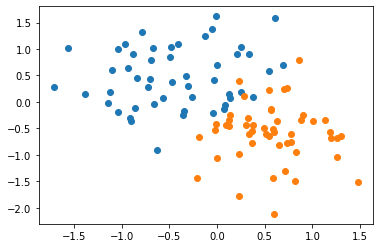

In [9]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [15]:
class LC(nn.Module):
    def __init__(self,inputsize, outputsize):
        super().__init__()
        self.linear = nn.Linear(inputsize,outputsize)

    def forward(self,x):
        pred = torch.sigmoid(self.linear(x))
        return pred

    def prediction(self,x):
        pred = torch.sigmoid(self.linear(x))

        if pred > 0.5:
            return 1
        else:
            return 0    

In [18]:
torch.manual_seed(2)
model = LC(2,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [27]:
x_data = torch.Tensor(X)
y_data = torch.Tensor(y).reshape(100,1)

In [21]:
[w,b] = model.parameters()
w1,w2 = w.view(2)
b1 = b[0]

def get_params():
    return (w1.item(),w2.item(),b1.item())

In [22]:
epochs = 1000
losses = []

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

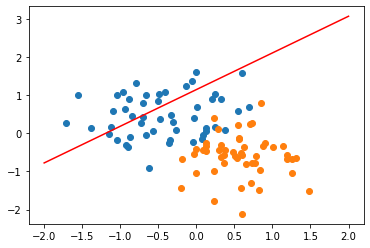

In [24]:
def plot_fit(title = ''):
    plt.title = title 
    w1,w2,b1 = get_params()
    x1 = np.array([-2,2])
    #r = w1.x2 + w2.x2 + b 
    x2 =  ( w1*x1 + b1 )/ -w2
    plt.plot(x1,x2,'r')
    plt.scatter(X[y==0,0],X[y==0,1])
    plt.scatter(X[y==1,0],X[y==1,1])


plot_fit()

In [ ]:
for i in range(epochs):
    pred = model.forward(x_data)
    loss = criterion(pred,y_data)
    print(f"for epoch {i} loss was {loss.item()}")
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


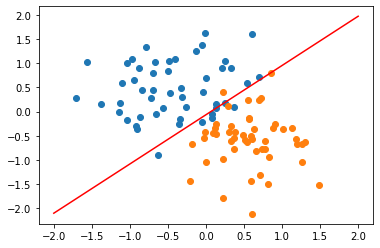

In [30]:
plot_fit()

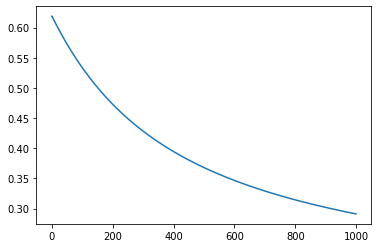

In [41]:
plt.plot(range(1000),losses[0:1000])